<a href="https://colab.research.google.com/github/MSRevathi1/Upgrad-Hackathon-Project/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
dataset=pd.read_csv('https://kh3-ls-storage.s3.us-east-1.amazonaws.com/Updated%20Project%20guide%20data%20set/creditcard.csv')

# New section

In [33]:
dataset.shape

(284807, 31)

In [34]:
 dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [35]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [36]:
pd.value_counts(dataset['Class'])

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
sns.countplot(dataset['Class'])

<Axes: ylabel='count'>

In [37]:
corrmat =  dataset.corr()

In [38]:
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Axes: >

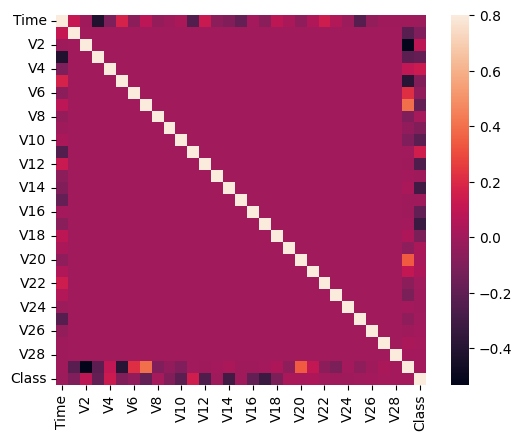

In [39]:
sns.heatmap(corrmat,vmax=0.8, square=True)

In [40]:
len(dataset[dataset['Class']==0]) # Valid transaction

284315

In [41]:
len(dataset[dataset['Class']==1]) # fradulent transactions


492

Feature matrix

In [42]:
X =  dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values

In [43]:

#convert imbalanced data to balanced data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_res , y_res = ros.fit_resample(X,y)

In [44]:
X.shape

(284807, 30)

In [45]:
x_res.shape


(568630, 30)

In [46]:
from collections import Counter
print(Counter(y))
print(Counter(y_res))


Counter({0: 284315, 1: 492})
Counter({0: 284315, 1: 284315})


In [47]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_res , y_res , test_size=0.3 , random_state=42)

In [48]:
x_train.shape


(398041, 30)

In [49]:
y_train.shape

(398041,)

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 641 , random_state=0)
classifier.fit(x_train , y_train)

RandomForestClassifier(n_estimators=641, random_state=0)

In [51]:
y_pred = classifier.predict(x_test)


n_errors = (y_pred != y_test).sum()


n_errors

7

In [52]:
y_test.shape

(170589,)

0.9999589657011883


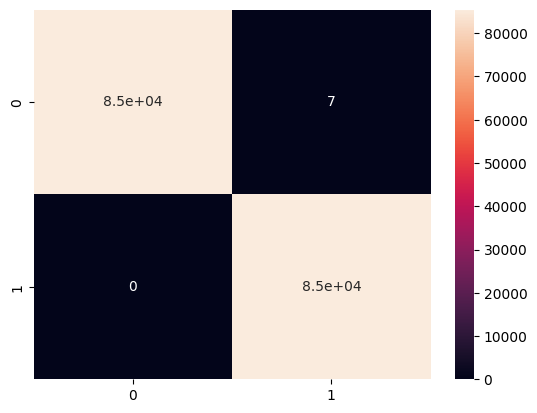

In [53]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True)
print(accuracy_score(y_test , y_pred))

In [54]:
from sklearn.metrics import precision_score
precision_score(y_test , y_pred)

0.9999180778728335

In [55]:
from sklearn.metrics import recall_score
recall_score(y_test , y_pred)

1.0

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

